### Part A

Loading the data and importing requrired modules

In [123]:
#read the data from the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
creditData = pd.read_csv('creditcard.csv')


Data analysis and Visualization 


In [124]:
creditData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


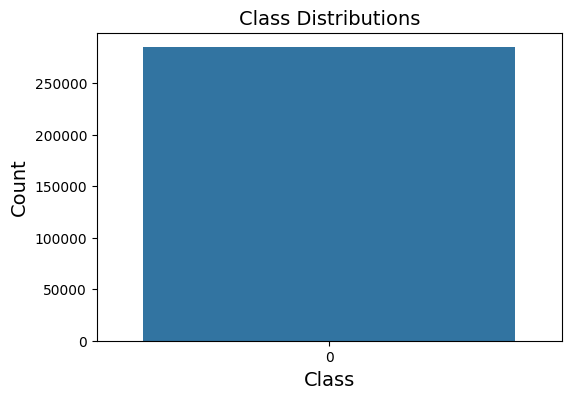

In [125]:
#plot the distribution of the data target variable class
plt.figure(figsize=(6,4))
sns.countplot(creditData['Class'])
plt.title('Class Distributions', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()



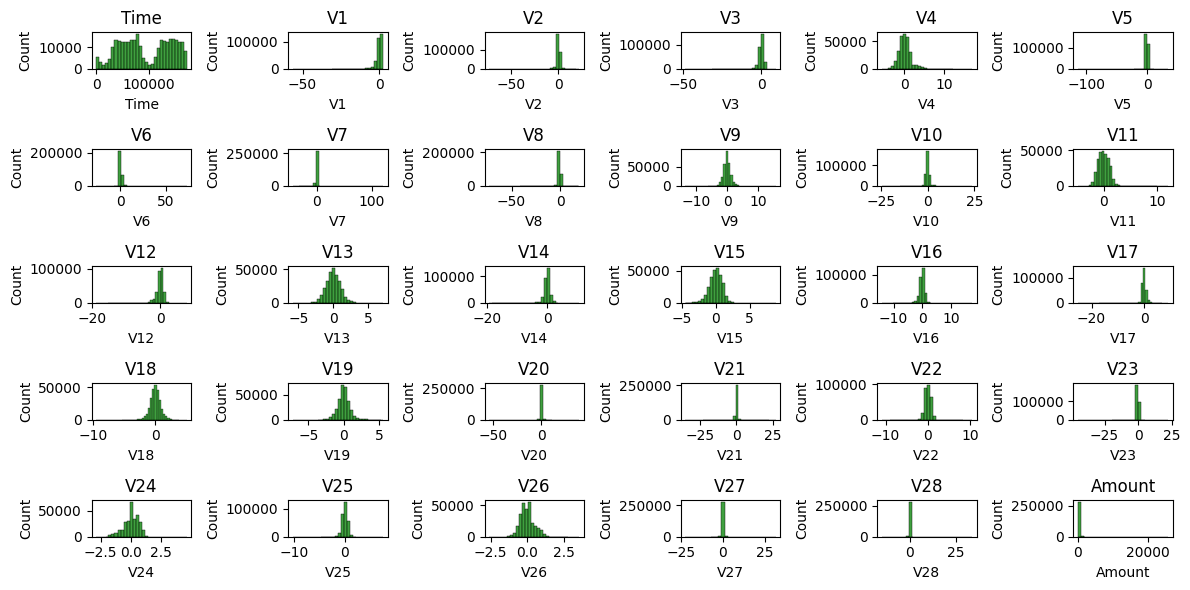

In [126]:
fraudData= creditData[creditData['Class']==1]
nonFraudData= creditData[creditData['Class']==0]

plt.figure(figsize=(12,6))
for i,column in enumerate(creditData.columns[:-1]):
    plt.subplot(5,6,i+1)
    sns.histplot(fraudData[column], bins=30, color='red')
    sns.histplot(nonFraudData[column], bins=30, color='green')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Data preprocessing

In [142]:
#check for missing values
creditData.isnull().sum()
#check for duplicate values
creditData.duplicated().sum()
#remove duplicate values
creditData.drop_duplicates(inplace=True)
#check for duplicate values
creditData.duplicated().sum()

0

Train and test spliting data 

In [143]:
#test and train data split
X = creditData.drop('Class', axis=1)
y = creditData['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model training

In [144]:
model= LogisticRegression()
model.fit(X_train, y_train)

c:\projects\notebooks\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict the data

In [145]:
y_pred = model.predict(X_test)

Evaluation

Accuracy:  0.9989661411217369
Precision:  0.7090909090909091
Recall:  0.582089552238806
F1 Score:  0.6393442622950819


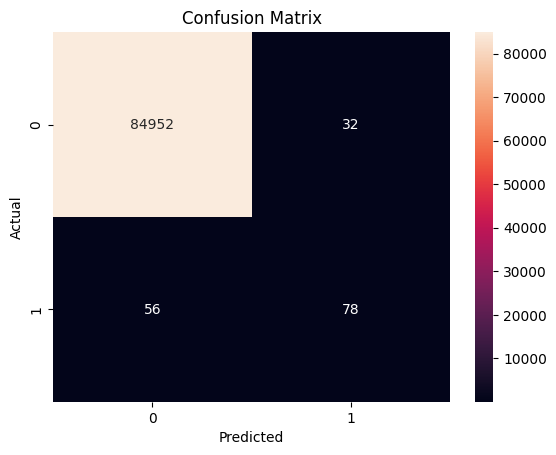

In [146]:
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
confusion= confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


#plotting the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


From the confusion matrix we can say that tthere are 78 true positves means frauds which are detected in the model and there are 32 false positives which are not classified wheres are there are 84952 instances which are true negative means model was able to detect non fraud acitivity and 56 values which are false negatives. 

### Part B

Importing required modules and loading data

In [131]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [132]:
insuranceData = pd.read_csv('insurance.csv')

Data preprocessing

In [133]:
insuranceData= pd.get_dummies(insuranceData, columns=['sex', 'smoker','region'])

In [149]:
#check for missing values
insuranceData.isnull().sum()
#check for duplicate values
insuranceData.duplicated().sum()
#remove duplicate values
insuranceData.drop_duplicates(inplace=True)

In [150]:
a= insuranceData.drop('charges', axis=1)
b= insuranceData['charges']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)


Training Model

In [151]:
model2 = LinearRegression()
model2.fit(a_train, b_train)

LinearRegression()

Predict on test data

In [152]:
y_pred = model2.predict(a_test)

Model evaluation

In [156]:
mae= mean_absolute_error(b_test, y_pred)
mse= mean_squared_error(b_test, y_pred)
rsme= np.sqrt(mse)
r2= r2_score(b_test, y_pred)

print("Mean Absolute Error: ", (mae))
print("Mean Squared Error: ", (mse))
print("Root Mean Squared Error: ", (rsme))
print("R2 Score: ", round(r2,2))

Mean Absolute Error:  4181.8159569423
Mean Squared Error:  38940169.92282636
Root Mean Squared Error:  6240.205919905718
R2 Score:  0.77
